## Harmonic oscillator

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class PauliAlgebra:
    def __init__(self, n:int):
        '''n is the dimension of pauli matrices'''
        self.n = n

    def get_basis(self)->np.ndarray:
        basis = []
        for j in range(self.n - 1):
            for k in range(j+1, self.n):
                temp = np.zeros((self.n, self.n))
                temp2 = np.zeros((self.n, self.n))
                temp[j,k] = 1
                temp2[k,j] = 1
                basis.append((temp + temp2) / np.sqrt(2.))

        for j in range(self.n - 1):
            for k in range(j+1, self.n):
                temp = np.zeros((self.n, self.n))
                temp2 = np.zeros((self.n, self.n))
                temp[j,k] = 1
                temp2[k,j] = 1
                basis.append(((temp - temp2) * -1j) / np.sqrt(2.))

        for l in range(1, self.n):
            _sum = np.zeros((self.n, self.n))
            temp = np.zeros((self.n, self.n))
            for j in range(l):
                tempp = np.zeros((self.n, self.n))
                tempp[j,j] = 1
                _sum += tempp
            temp[l,l] = 1
            basis.append((np.sqrt(2. / l / (l+1)) * (_sum - l * temp)) / np.sqrt(2.))

        basis.append(np.identity(self.n) / np.sqrt(self.n))
        basis = np.array(basis)
        basis_flattened = np.array([ibasis.flatten() for ibasis in basis])
        return basis, basis_flattened

    def get_coef(self, basis:np.ndarray, mat:np.ndarray)->np.ndarray:
        if not isinstance(mat, np.ndarray):
            mat = np.array(mat)
        if mat.shape[0] * mat.shape[1] != len(basis):
            raise ValueError("dimensions of mat and pauli do not match!")
        pauli_flattened = np.array([ipauli.flatten() for ipauli in basis])
        mat_flattened = mat.flatten()
        coef = [np.dot(np.conjugate(pauli_flattened[i]), mat_flattened) for i in range(len(pauli_flattened))]
        return np.array(coef)


$$\hat{H} = \hat{T} + \hat{V} = \frac{p^2}{2m} + \frac{m \omega^2}{2} x^2 = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{m \omega^2}{2} x^2$$

$$\frac{d^2}{dx^2} = \begin{bmatrix}
    2 & -1 & 0 & \cdots & 0 & 0 & 0 \\
    -1 & 2 & -1 & \cdots & 0 & 0 & 0 \\
    0 & -1 & 2 & -1 & \cdots & 0 & 0  \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & \cdots & -1 & 2 & -1 \\
    0 & 0 & 0 & \cdots & 0 & -1 & 2 \\
\end{bmatrix}$$

Under coordinate representation, potential operator is diagonal, with diagonal elements being the potential at each position

In [17]:
hbar = 1.
m = 1.
omega = 0.2
npoints = 500

xmin = -10.
xmax = 10.
x = np.diag(np.linspace(start=xmin, stop=xmax,endpoint=True,num=npoints))
dx = x[1,1] - x[0,0]

potential = np.matmul(x,x) * m * omega**2 / 2.
kinetic = (np.diag([-2 for _ in range(npoints)],k=0) + np.diag([1 for _ in range(npoints - 1)],k=-1) + np.diag([1 for _ in range(npoints - 1)],k=1)) * -hbar**2 / 2. / m
hamiltonian = potential + kinetic


def sort_(data:list):
    sorted_data = [i for i in sorted(enumerate(data), reverse=False, key=lambda x:x[1])]
    idx = []
    val = []
    for i in sorted_data:
        idx.append(i[0])
        val.append(i[1])
    return idx,val

def isOrthonormal(vec:np.ndarray, idx1:int, idx2:int):
    if not isinstance(vec, np.ndarray):
        raise ValueError("input vec should be np.ndarray type")
    result = sum(np.conjugate(vec[:,idx1]) * vec[:,idx2])
    if idx1 == idx2:
        return(np.isclose(result, 1.))
    else:
        return(np.isclose(result, 0.))
    

In [18]:
val,vec = np.linalg.eigh(hamiltonian)
idx, sorted_val = sort_(val)
sorted_vec = vec[idx]

normalization_factor = [np.sqrt(sum(sorted_vec[:,j]**2)) for j in range(len(sorted_vec))]
for i in range(len(sorted_vec)):
    sorted_vec[:,i] /= normalization_factor[i]

[]

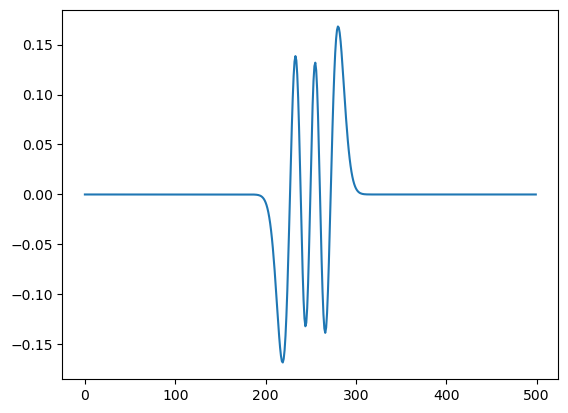

In [19]:
plt.plot(vec[:,5])
plt.plot()

In [20]:
result = [[isOrthonormal(vec,i,j) for i in range(50)] for j in range(50)]
print(result)

[[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

Annihilation operator $\hat{a}$ is not hermitian, its eigenvalues are generally complex:
$$ \hat{a}|\alpha\rangle = \alpha|\alpha\rangle, $$
where $|\alpha\rangle$ is the **coherent state**. 

In the coordinate representation, annihilation operator reads
$$a = \sqrt{\frac{m \omega}{2\hbar}}\left( x + \frac{ip}{m\omega} \right),$$
which renders an ODE
$$\sqrt{\frac{m\omega}{2\hbar}}\left(xf + \frac{\hbar}{m\omega}f^\prime\right) = \alpha f$$

We require $|f\rangle$ to be normalized, so 
$$f(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} \exp{\left[-\frac{m\omega}{2\hbar}x^2 + \sqrt{\frac{2m\omega}{\hbar}}\alpha x - |\alpha|^2 \cos^2{\theta}\right]} $$

Eigenvectors of qho form a complete basis set, $|\alpha\rangle$ can be represented as linear combination of them
$$\begin{split}
    & |\alpha\rangle = \sum_{n=0}^\infty c_n |n\rangle \\
    & \langle m|n \rangle = \delta_{mn} \\
    & \sum_m |m\rangle\langle m| = 1 \\
\end{split} $$

Here $\{|n\rangle | n=1,2,\cdots\}$ are eigenvectors of qho under particle number representation(Fock space).
$$\begin{split}
    & a|n\rangle = \sqrt{n}|n-1\rangle \\
    & a |\alpha\rangle = \alpha|\alpha\rangle \\
    & a|0\rangle = 0 \\
\end{split}$$

So $|0\rangle$ is an eigenvector of $\hat{a}$. 

$$\begin{split}
    & a|\alpha\rangle = \alpha|\alpha\rangle \\
    & a\sum_{n=0}^\infty c_n|n\rangle = \sum_{n=0}^\infty c_{n+1}\sqrt{n+1}|n\rangle = \alpha|\alpha\rangle = \alpha\sum_{n=0}^\infty c_n |n\rangle \\
    & \Rightarrow \sum_{n=0}^\infty c_{n+1}\sqrt{n+1}|n\rangle = \alpha\sum_{n=0}^\infty c_n |n\rangle \\
    & \therefore c_{n+1}\sqrt{n+1}|n\rangle = \alpha c_n |n\rangle \\
    & c_n = \frac{\alpha c_{n-1}}{\sqrt{n}} = \frac{\alpha}{\sqrt{n}} \frac{\alpha}{\sqrt{n-1}} c_{n-2} = \frac{\alpha}{\sqrt{n}}\frac{\alpha}{\sqrt{n-1}}\frac{\alpha}{\sqrt{n-2}} c_{n-3} = \cdots = \frac{\alpha^n}{\sqrt{n!}} c_0 \\
\end{split}$$

therefore $|\alpha\rangle = \sum_{n=0}^\infty c_n|n\rangle = \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}}c_0 |n\rangle$. $\hat{a}$ is not hermitian, so its eigenvalue $\alpha$ is in general complex. We require $|\alpha\rangle$ to be normalized, which gives $\langle\alpha|\alpha\rangle = |c_0|^2\sum_{n=0}^\infty \frac{\left(|\alpha|^2\right)^n}{n!} = |c_0|^2 e^{|\alpha|^2} = 1$, $c_0 = e^{-\frac{|\alpha|^2}{2}}$, and finally
$$|\alpha\rangle = e^{-\frac{|\alpha|^2}{2}}\sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}}|n\rangle$$
$|\alpha\rangle$ is eigenvector of a non-hermitian matrix, therefore eigenvectors corresponding to two different eigenvalues are not orthogonal to each other
...


In addition to solving the corresponding ODE, another way to get the coordinate representation of coherent state is to take the inner product
$$f_\alpha(x) = \langle x|\alpha\rangle = e^{\frac{|\alpha|^2}{2}}\sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}}\langle x|n\rangle,$$
where $f_n(x) = \langle x|\alpha\rangle$ is the eigenvector of qho but under coordinate representation. 

$$\begin{split}
    & \langle x|n \rangle = f_n(x) = \sqrt{\frac{1}{2^n n!}}\left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega}{2\hbar}x^2} H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right),\;\;\;\alpha = |\alpha|e^{i\theta} \\
    & \langle x|\alpha \rangle = e^{-\frac{|\alpha|^2}{2}} \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega}{2\hbar}x^2} \sum_{n=0}^\infty \frac{1}{n!} \left(\frac{\alpha}{\sqrt{2}}\right)^n H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right) \\
\end{split}$$

Generating function of Hermite polynomial is $e^{2xt-t^2} = \sum_{n=0}^\infty \frac{t^n}{n!}H_n(x)$. Thus
$$\langle x|\alpha \rangle = e^{-\frac{|\alpha|^2}{2}}\left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} \exp{\left[-\frac{m\omega}{2\hbar}x^2 + \sqrt{\frac{2m\omega}{\hbar}}\alpha x - \frac{\alpha^2}{2}\right]}$$

Note that solving ODE and summing up Hermite polynomial provide answers that differ a little bit
$$\begin{split}
    & f_\alpha(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} \exp{\left[-\frac{m\omega}{2\hbar}x^2 + \sqrt{\frac{2m\omega}{\hbar}}\alpha x - |\alpha|^2\cos^2\theta\right]} \\
    & f_\alpha(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{|\alpha|^2}{2}}\exp{\left[-\frac{m\omega}{2\hbar}x^2 + \sqrt{\frac{2m\omega}{\hbar}}\alpha x - \frac{\alpha^2}{2}\right]} \\
\end{split}$$

The difference lies on $\exp{\left[-|\alpha|^2\cos^2\theta\right]}$ and $\exp{\left[-\frac{|\alpha|^2}{2} - \frac{\alpha^2}{2}\right]}$, and $-\frac{1}{2}\left(|\alpha|^2 + \alpha^2\right) = -|\alpha|^2\cos^2\theta - \frac{1}{2}i\sin 2\theta |\alpha|^2$. They differ by a phase factor $e^{i\sin 2\theta |\alpha|^2}$, which is common in qm. 

To facilitate the implementation, we reformulate the coherent state
$$\begin{split}
    & f_\alpha(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega}{2\hbar}\left(x - \sqrt{\frac{2\hbar}{m\omega}}
|\alpha|\cos\theta\right)^2} \left[ \cos{\left(|\alpha|\sqrt{\frac{2m\omega}{\hbar}}\sin\theta x\right)} + i\sin{\left(|\alpha|\sqrt{\frac{2m\omega}{\hbar}}\sin\theta x\right)} \right] \\
    & f_\alpha(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega}{2\hbar}\left(x - \sqrt{\frac{2\hbar}{m\omega}}
\Re{[\alpha]}\right)^2} \left[ \cos{\left(\sqrt{\frac{2m\omega}{\hbar}}\Im{[\alpha]} x\right)} + i\sin{\left(\sqrt{\frac{2m\omega}{\hbar}}\Im{[\alpha]} x\right)} \right] \\
\end{split}$$

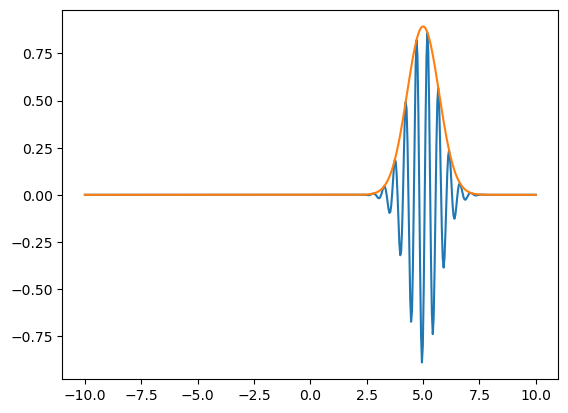

In [21]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.
mass = 1.
omega = 2.
pi = np.pi
npoints = 500
alpha = 5. - 6.5* 1j

def coherent(alpha_real_part:float, alpha_imag_part:float, x:np.ndarray)->np.ndarray:
    if not isinstance(x,np.ndarray):
        x = np.array(x)
    leading = (mass * omega / pi / hbar)**0.25 * np.exp(-mass * omega / 2 / hbar * (x - np.sqrt(2 * hbar / mass / omega) * alpha_real_part)**2)
    real = np.cos(np.sqrt(2 * mass * omega / hbar) * x * alpha_imag_part)
    imag = np.sin(np.sqrt(2 * mass * omega / hbar) * x * alpha_imag_part)
    result_real = leading * real
    result_imag = leading * imag
    result_abs = leading
    return result_real, result_imag, result_abs


x = np.linspace(start=-10., stop=10, num=npoints, endpoint=True, dtype=float)
coherent_real, coherent_imag, coherent_abs = coherent(alpha_imag_part=np.imag(alpha), alpha_real_part=np.real(alpha), x=x)

plt.plot(np.linspace(-10.,10.,num=500), coherent_imag)
plt.plot(np.linspace(-10.,10.,num=500), coherent_abs)
plt.show()

The norm of coherent state $|f_\alpha(x)|$ is gaussian, the imaginary part controls oscillatory frequency, real part controls where it oscillates.

Heisenberg eom reads
$$\frac{d}{dt}\hat{A_H}(t) = \frac{1}{i\hbar}\left[A_H(t), H\right],$$
in this case $\hat{A_H}$ is annihilation operator. Note that $\left[a,H\right] = \left(aa^\dagger a - a^\dagger aa\right)\hbar\omega = a\hbar\omega$, so
$$\frac{d}{dt}\hat{a(t)} = \frac{\hbar\omega}{i\hbar}a(t) = \Rightarrow \hat{a(t)} = \hat{a_0}e^{-i\omega t}$$

The time-dependence sits in the eigenvalue of annihilation operator
$$\hat{a}(t)|\alpha\rangle = \alpha(t)|\alpha\rangle$$

Plugging $\hat{a}(t)$ into it gives 
$$\alpha(t) = \alpha_0 e^{-i\omega t}$$

So the time-dependent coherent state is
$$\begin{split}
    & f_\alpha(x,t) = \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}} e^{-\frac{m\omega}{2\hbar}\left(x - \sqrt{\frac{2\hbar}{m\omega}}
\Re{[\alpha_0 e^{-i\omega t}]}\right)^2} \left[ \cos{\left(\sqrt{\frac{2m\omega}{\hbar}}\Im{[\alpha_0 e^{-i\omega t}]} x\right)} + i\sin{\left(\sqrt{\frac{2m\omega}{\hbar}}\Im{[\alpha_0 e^{-i\omega t}]} x\right)} \right] \\
\end{split}$$

Note that $\alpha_0$ is also complex in general. From the formula above, we see that the width of gaussian envolope is $\frac{m\omega}{2\hbar}$, which is constant, thus the wavepackage does not spread in time.

In [22]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

mass = 1.
hbar = 1.
omega = 0.5
alpha0 = 5. - 1j

def real_(t:float)->float:
    result = np.real(alpha0) * np.cos(omega * t) + np.imag(alpha0) * np.sin(omega * t)
    return result

def imag_(t:float)->float:
    result = np.imag(alpha0) * np.cos(omega * t) - np.real(alpha0) * np.sin(omega * t)
    return result

def coherentT(x:np.ndarray, t:float)->np.ndarray:
    if not isinstance(x,np.ndarray):
        x = np.array(x)
    result = (mass * omega / np.pi / hbar)**0.25 * np.exp(-mass * omega / 2. / hbar * (x - np.sqrt(2 * hbar / mass / omega) * real_(t))**2) \
    * (np.cos(np.sqrt(2 * mass * omega / hbar) * imag_(t) * x) + 1j * np.sin(np.sqrt(2 * mass * omega / hbar) * imag_(t) * x))
    return result


d:\anaconda\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


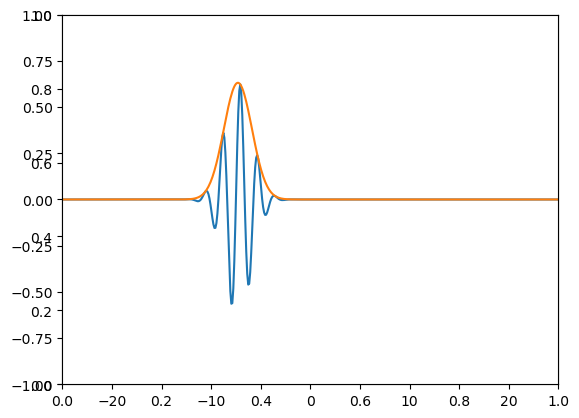

In [23]:
x = np.linspace(start=-25., stop=25, num=npoints, endpoint=True, dtype=float)
t = np.arange(0,20.1,0.1)

fig, ax = plt.subplots()
ax = plt.axes(xlim=(-25,25), ylim=(-1,1))
plot_real, = ax.plot([],[])
plot_abs,  = ax.plot([],[])

def update(itime:int):
    plot_real.set_data(x, np.real(coherentT(x, t=t[itime])))
    plot_abs.set_data(x, np.abs(coherentT(x,t=t[itime])))
    return plot_real, plot_abs

ani = animation.FuncAnimation(fig=fig, func=update, frames=len(t))
ani.save("test.gif")
plt.show()

<!-- ### TDSE--A different perspective
$i\hbar \frac{\partial }{\partial t}f(\bm{r},t) = H f(\bm{r},t)$. Let $\{\phi_n | n=1,2,\cdots\}$ be orthonormal basis set, so
$$\begin{split}
     & i\hbar \frac{\partial}{\partial t}f = Hf \\
     & i\hbar \frac{\partial}{\partial t} \sum_{i=1}^\infty c_i \phi_i = H \sum_{j=1}^\infty c_j \phi_j \\
     & i\hbar \sum_i \frac{\partial c_i}{\partial t}\phi_i = \sum_j c_j H \phi_j \\
     & \Leftrightarrow i\hbar \sum_i \frac{\partial c_i}{\partial t} \langle \phi_i|\phi_i \rangle = \sum_j c_j \langle \phi_i | H | \phi_j \rangle \\
     & i\hbar \frac{\partial c_i}{\partial t} = \sum_j c_j H_{ij} \\
     & \Leftrightarrow i\hbar \frac{\partial}{\partial t} \langle \phi_i | f \rangle = \sum_j \langle \phi_j|f \rangle H_{ij} \\
\end{split}$$

$\{\phi_i\}$ are stationary and do not change in time, but their weights in linear combination do. The time evolution of a state $|f \rangle$ sits in the change of coefficients $|f(\bm{r},t)\rangle = \sum_i c_i(t)|\phi_i(\bm{r})\rangle$.  -->